In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('netflix1.csv')
print(data.head())
print(data.info())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [15]:
print(data['type'].value_counts())
print((data['type'].value_counts())/len(data)*100)
# Our dataset is skewed towards Movies, making up approximately 70% of the entries in our dataset, while TV Shows make up approximately 30%. This should be kept in mind when comparing trends as our results could be influenced by Movies.

type
Movie      6126
TV Show    2664
Name: count, dtype: int64
type
Movie      69.692833
TV Show    30.307167
Name: count, dtype: float64


In [17]:
print('Director value counts\n')
print(data['director'].value_counts())
print(data['director'].value_counts()/len(data)*100)
# Approximately 30% of the dataset does not have a director recorded. This will need to be investigated further.
print('\nMissing director entry investigation\n')
TV_Show_no_director = data[(data['director'] == 'Not Given') & (data['type'] == 'TV Show')]
total_tv = (data['type'] == 'TV Show').sum()
print('\nPercentage of TV_Show entry with no director given\n')
print(len(TV_Show_no_director) / total_tv * 100)
# This tells us that 2415 entries where the type is TV Show, there is no director information recorded. Out of the total 2664 entries for type TV Shows, this results in approxiamtely 91% of the rows with no director. This could mean that the director attributes are less consistently recorded compared to Movies. If the analysis includes directors, we should focus on the type of movie.
# Further investigation shows that director information is missing disproportionately for TV Shows. Around 91% of TV Show entries lack a recorded director, compared to a much smaller proportion for Movies. This suggests that director attribution is less consistently recorded for TV Shows,
print(data.groupby('country')['director'].nunique().sort_values(ascending=False))
total_directors = data['director'].nunique()
print('\nPercentage of total directors associated to titles from each country\n')
print(data.groupby('country')['director'].nunique().sort_values(ascending=False)/(total_directors)*100)
# Many movies and TV Shows are being produced worldwide. However, there is a strong presence of directors credited to titles associated with the United States, which accounts for 1,751 distinct directors, approximately 39% of unique director strings appear in titles associated with the United States. The USA is followed by India, with 670 distinct directors credited to titles associated to India, this results to approximately 15% of unique director strings.
# There are 244 titles with director information, but no country is recorded.


Director value counts

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64
director
Not Given                         29.442548
Rajiv Chilaka                      0.227531
Alastair Fothergill                0.204778
Raúl Campos, Jan Suter             0.204778
Suhas Kadav                        0.182025
                                    ...    
Matt D'Avella                      0.011377
Parthiban                          0.011377
Scott McAboy                       0.011377
Raymie Muzquiz, Stu Livingston     0.011377
Mozez Singh                        0.011377
Name: 


Extracting move duration

Average movie duration by country
country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           125.065574
                   ...    
Pakistan         76.633803
Georgia          71.500000
Guatemala        69.000000
Syria            51.500000
Namibia          29.000000
Name: duration_min, Length: 79, dtype: float64

Average movie duration by movie rating
rating
NC-17       125.000000
TV-14       110.290820
PG-13       108.330612
R           106.720201
UR          106.333333
PG           98.282230
TV-MA        95.889913
TV-PG        94.851852
NR           94.533333
G            90.268293
TV-G         79.666667
TV-Y7-FV     68.400000
TV-Y7        66.287770
TV-Y         48.114504
Name: duration_min, dtype: float64

Investigating move duration by year

Box plot to explore duration distribution


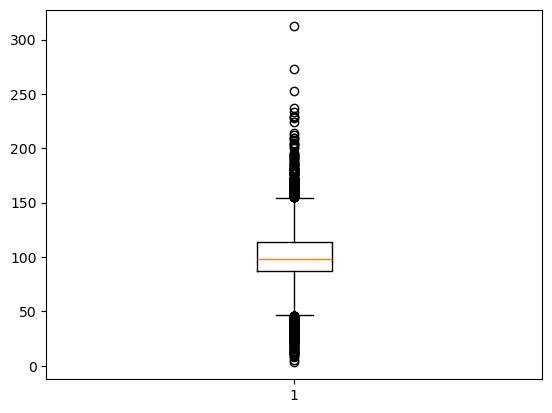

99.58488410055502
98.0
release_year
1973    102.5
1979    109.5
1980    114.0
1981    112.0
1982    118.0
Name: duration_min, dtype: float64


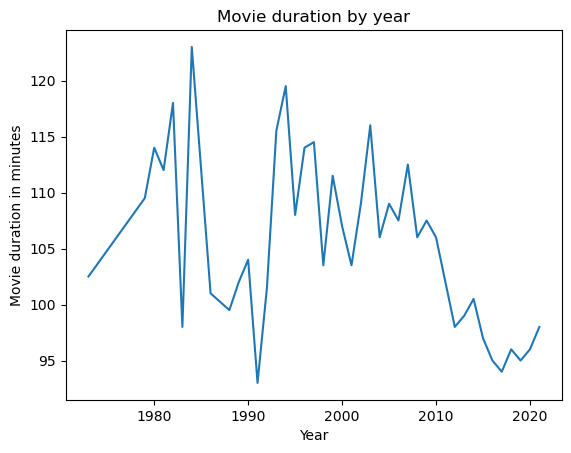

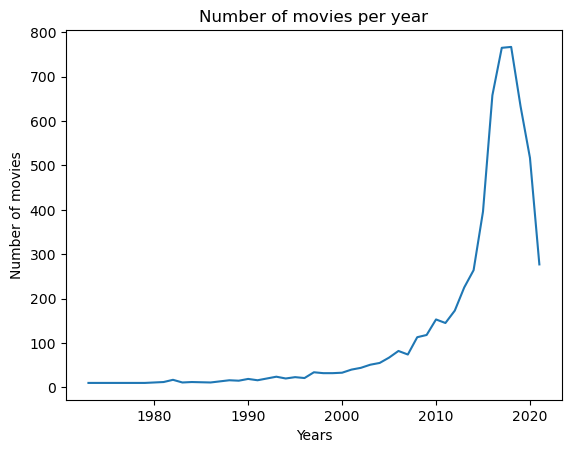

In [21]:
print('\nExtracting move duration\n')
Movies = data[data['type'] == 'Movie'].copy()
Movies['duration_min'] = (Movies['duration'].str.replace(' min', '', regex=False).astype(int))
print('Average movie duration by country')
print(Movies.groupby('country')['duration_min'].mean().sort_values(ascending = False))
# The average runtime of movies varies across countries in the dataset, suggesting differences in production characteristics or storytelling conventions. While this analysis does not reflect viewer behaviour, it highlights how movie length distributions differ across regions.
print('\nAverage movie duration by movie rating')
print(Movies.groupby('rating')['duration_min'].mean().sort_values(ascending = False))

print('\nInvestigating move duration by year\n')
year_counts = Movies.groupby('release_year').size()
valid_years = year_counts[year_counts >= 10].index
duration_by_year = Movies[Movies['release_year'].isin(valid_years)]

print('Box plot to explore duration distribution')
plt.boxplot(Movies['duration_min'])
plt.show()
plt.clf()
print(Movies['duration_min'].mean())
print(Movies['duration_min'].median())
# The boxplot shows a longer tail with higher values, this indicates that our movie duration could be positively skewed. We can confirm this theory by looking at the mean and median, where we can see the mean is larger as it is influenced by those larger values in the right tail. This is why we will be using the median as a measure of central tendency for movie duration.
duration_by_year_median = duration_by_year.groupby('release_year')['duration_min'].median()
print(duration_by_year_median.head())

plt.plot(duration_by_year_median.index, duration_by_year_median.values)
plt.title('Movie duration by year')
plt.xlabel('Year')
plt.ylabel('Movie duration in minutes')
plt.show()
plt.clf()
# The median movie duration in the earlier years within our dataset was quite high, going over 120 minutes between 1980 and 1990. This observation is based on years with 10 or more titles and may reflect the inclusion of longer films compared to broader industry-wide trends. We can see a steady drop in median movie duration within our dataset from around 2005 to 2017, and then we see a slow increase in median movie duration from 2017 to 2022.

duration_by_year_count = duration_by_year.groupby('release_year')['duration_min'].count()
plt.plot(duration_by_year_count.index, duration_by_year_count.values)
plt.title('Number of movies per year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()
# This graph shows us the number of movies we have in our dataset for each year. We can clearly see a large increase in movies from 2010 onwards. This just indicates that we should be cautious when observing the earlier years, as our sample sizes are quite small.


Number of TV Shows associated with each country

country
United States           845
Pakistan                350
United Kingdom          251
Japan                   172
South Korea             165
Canada                   84
India                    81
Taiwan                   71
France                   65
Australia                53
Spain                    53
Mexico                   48
China                    41
Not Given                30
Turkey                   30
Brazil                   28
Germany                  25
Colombia                 25
Thailand                 24
Argentina                20
Italy                    19
Singapore                18
Egypt                    14
Russia                   14
Denmark                  11
Israel                   10
Norway                    9
Nigeria                   9
Belgium                   9
Poland                    8
Sweden                    8
Malaysia                  7
South Africa              7
Lebanon            

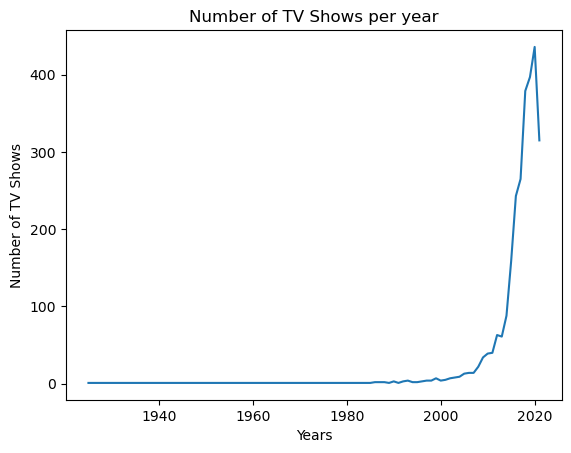

<Figure size 640x480 with 0 Axes>

In [23]:
print('Number of TV Shows associated with each country\n')
TV_Shows = data[data['type'] == 'TV Show']
TV_Shows_by_country = TV_Shows.groupby('country')['title'].count().sort_values(ascending = False)
print(TV_Shows_by_country)
# We can see the number of TV Shows associated with each country within our dataset. From these numbers, we can clearly see the strong presence of the United States in our TV Show entries.
print('\nNumber of TV Shows released per year')
TV_Shows_release_by_year = TV_Shows.groupby('release_year')['title'].count().sort_index()
print(TV_Shows_release_by_year)

plt.plot(TV_Shows_release_by_year.index, TV_Shows_release_by_year.values)
plt.title('Number of TV Shows per year')
plt.xlabel('Years')
plt.ylabel('Number of TV Shows')
plt.show()
plt.clf()
# We can see an increase in TV Shows in recent years in our dataset, with smaller sample sizes for earlier years, pre 2000s.

In [39]:
clean_data = data.copy()
clean_data_movies = clean_data[clean_data['type'] == 'Movie'].copy()
clean_data_movies['duration_min'] = (clean_data_movies['duration'].str.replace(' min', '', regex=False).astype(int))
clean_data_tv_show = clean_data[clean_data['type'] == 'TV Show']
print(clean_data_movies.head())
print(clean_data_tv_show.head())

clean_data_movies.to_csv('clean_data_movies', index=False)
clean_data_tv_show.to_csv('clean_data_tv_show', index=False)

  show_id   type                             title         director  \
0      s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
3     s14  Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8  Movie                           Sankofa     Haile Gerima   
6     s10  Movie                      The Starling   Theodore Melfi   
7    s939  Movie   Motu Patlu in the Game of Zones      Suhas Kadav   

         country date_added  release_year rating duration  \
0  United States  9/25/2021          2020  PG-13   90 min   
3         Brazil  9/22/2021          2021  TV-PG   91 min   
4  United States  9/24/2021          1993  TV-MA  125 min   
6  United States  9/24/2021          2021  PG-13  104 min   
7          India   5/1/2021          2019  TV-Y7   87 min   

                                           listed_in  duration_min  
0                                      Documentaries            90  
3                 Children & Family Movies, Comedies            91  